# Segmentos y Churn de Hotel VIP

## Objetivo:

Como dueño de un hotel famoso y con muchas transacciones, registro comercial pendiente a confirmar, deseo saber cuales son mis segmentos de clientes y que segmento es el que tiene mayor perdida porcentual de clientes.


## Datos:

- tlacuachitos_vip_transactions.csv
- tlacuachitos_vip_customers_data.csv

## Actividad 1)
- Elabora y explica segmentos de clientes que podría usar para realizar mi dirección estratégica.

## Actividad 2)
- Calcula y obtén el porcentaje de clientes perdidos que tengo en cada segmento

## Datos

In [3]:
import pandas as pd 
df_cx=pd.read_csv("tlacuachitos_vip_customers_data.csv")
df_transactions=pd.read_csv("transactions.csv")

In [5]:
df_cx.head(3)

,CustomerID,Age,Income,Tenure,Education,Industry,Geographic Location,Churn_Risk,Cohort
0,1,56,52752.677346,3,Master,Technology,Europe,1,2023-08-31
1,2,69,55297.364348,6,Bachelor,Technology,South America,0,2021-08-31
2,3,46,57978.753383,3,Bachelor,Finance,Europe,1,2019-05-31


In [6]:
df_cx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           1143 non-null   int64  
 1   Age                  1143 non-null   int64  
 2   Income               1143 non-null   float64
 3   Tenure               1143 non-null   int64  
 4   Education            1143 non-null   object 
 5   Industry             1143 non-null   object 
 6   Geographic Location  1143 non-null   object 
 7   Churn_Risk           1143 non-null   int64  
 8   Cohort               1143 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 80.5+ KB


In [10]:
# Importar librerías necesarias
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import set_config
set_config(working_memory=1024)

# Cargar el conjunto de datos 'tips' de Seaborn
data = df_cx[["Age","Income","Tenure","Education","Industry","Geographic Location"]]

# Convertir variables categóricas en variables dummies
categorical_features = ['Education', 'Industry', 'Geographic Location']
data_encoded = pd.get_dummies(data, columns=categorical_features, drop_first=True)

# Preparar los datos seleccionando características relevantes y normalizándolos
features = ['Age', 'Income', 'Tenure'] + list(data_encoded.columns[3:])  # Incluir características categóricas codificadas
x = data_encoded.loc[:, features].values
x = StandardScaler().fit_transform(x)  # Normalización de las características

# Aplicar K-means clustering para identificar segmentos de clientes
kmeans = KMeans(n_clusters=5, random_state=42) 
labels = kmeans.fit_predict(x)

# Agregar las etiquetas del cluster al DataFrame original para análisis
data_encoded['Cluster'] = labels



C:\Users\chris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


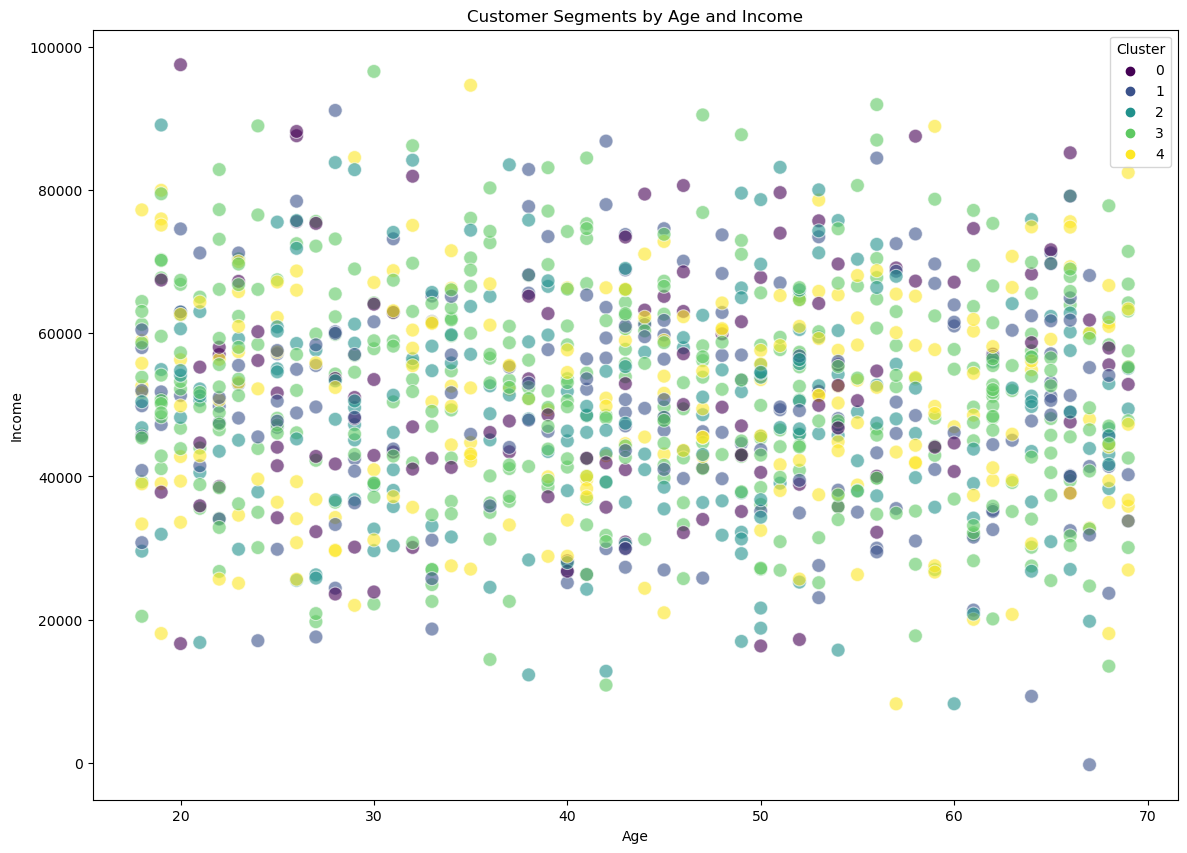

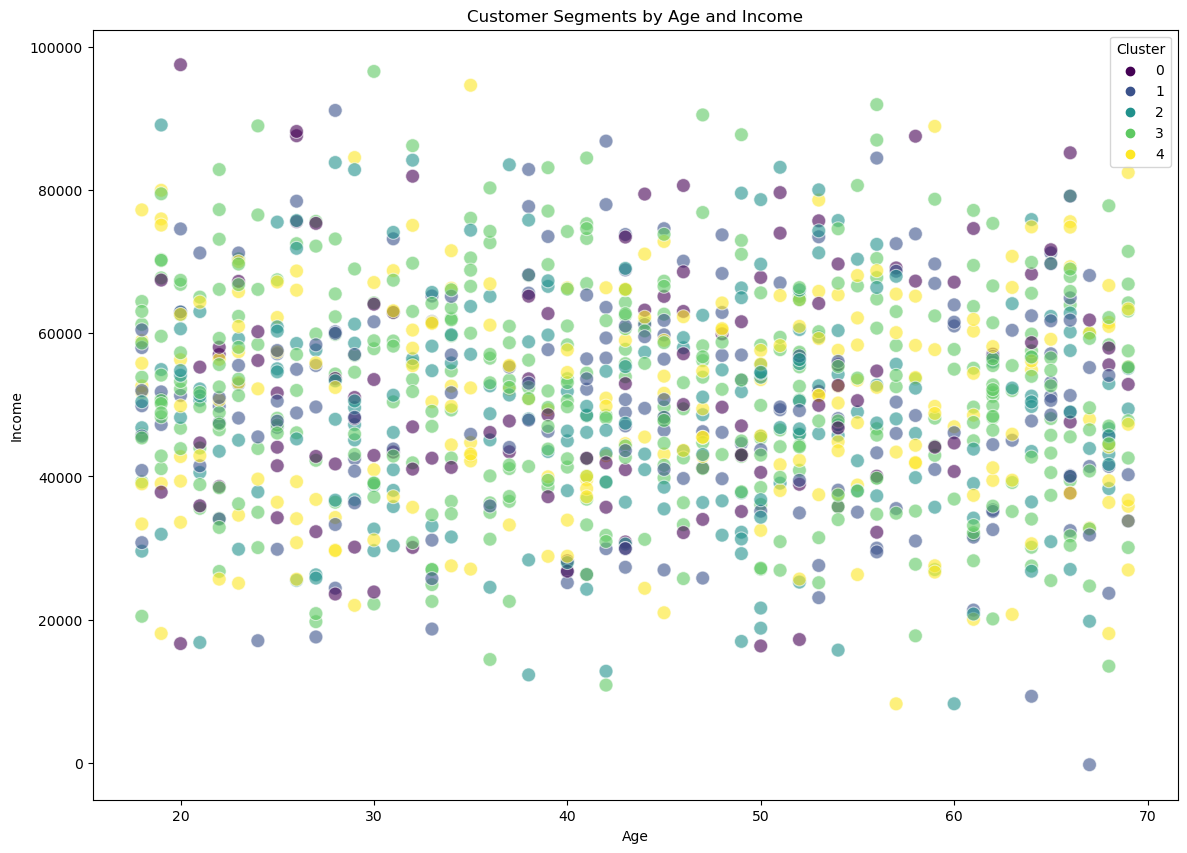

In [22]:
plt.figure(figsize=(14, 10))

# Crear un gráfico de dispersión para visualizar los clusters
sns.scatterplot(x='Age', y='Income', hue='Cluster', palette='viridis', data=data_encoded, s=100, alpha=0.6, edgecolor='w')

# Etiquetas y título
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Customer Segments by Age and Income')

# Mostrar la gráfica
plt.show()

plt.figure(figsize=(14, 10))

# Crear un gráfico de dispersión para visualizar los clusters
sns.scatterplot(x='Age', y='Income', hue='Cluster', palette='viridis', data=data_encoded, s=100, alpha=0.6, edgecolor='w')

# Etiquetas y título
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Customer Segments by Age and Income')

# Mostrar la gráfica
plt.show()

C:\Users\chris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\chris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\chris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\chris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

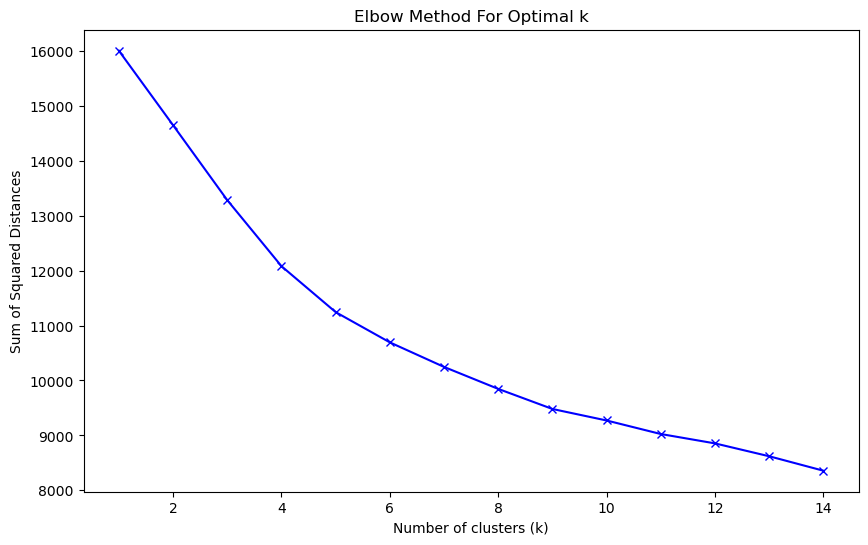

In [13]:
# Determinar el número óptimo de clusters usando el método del codo
sum_of_squared_distances = []
K = range(1, 15)  # Ajuste el rango según sea necesario
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km = km.fit(x)
    sum_of_squared_distances.append(km.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

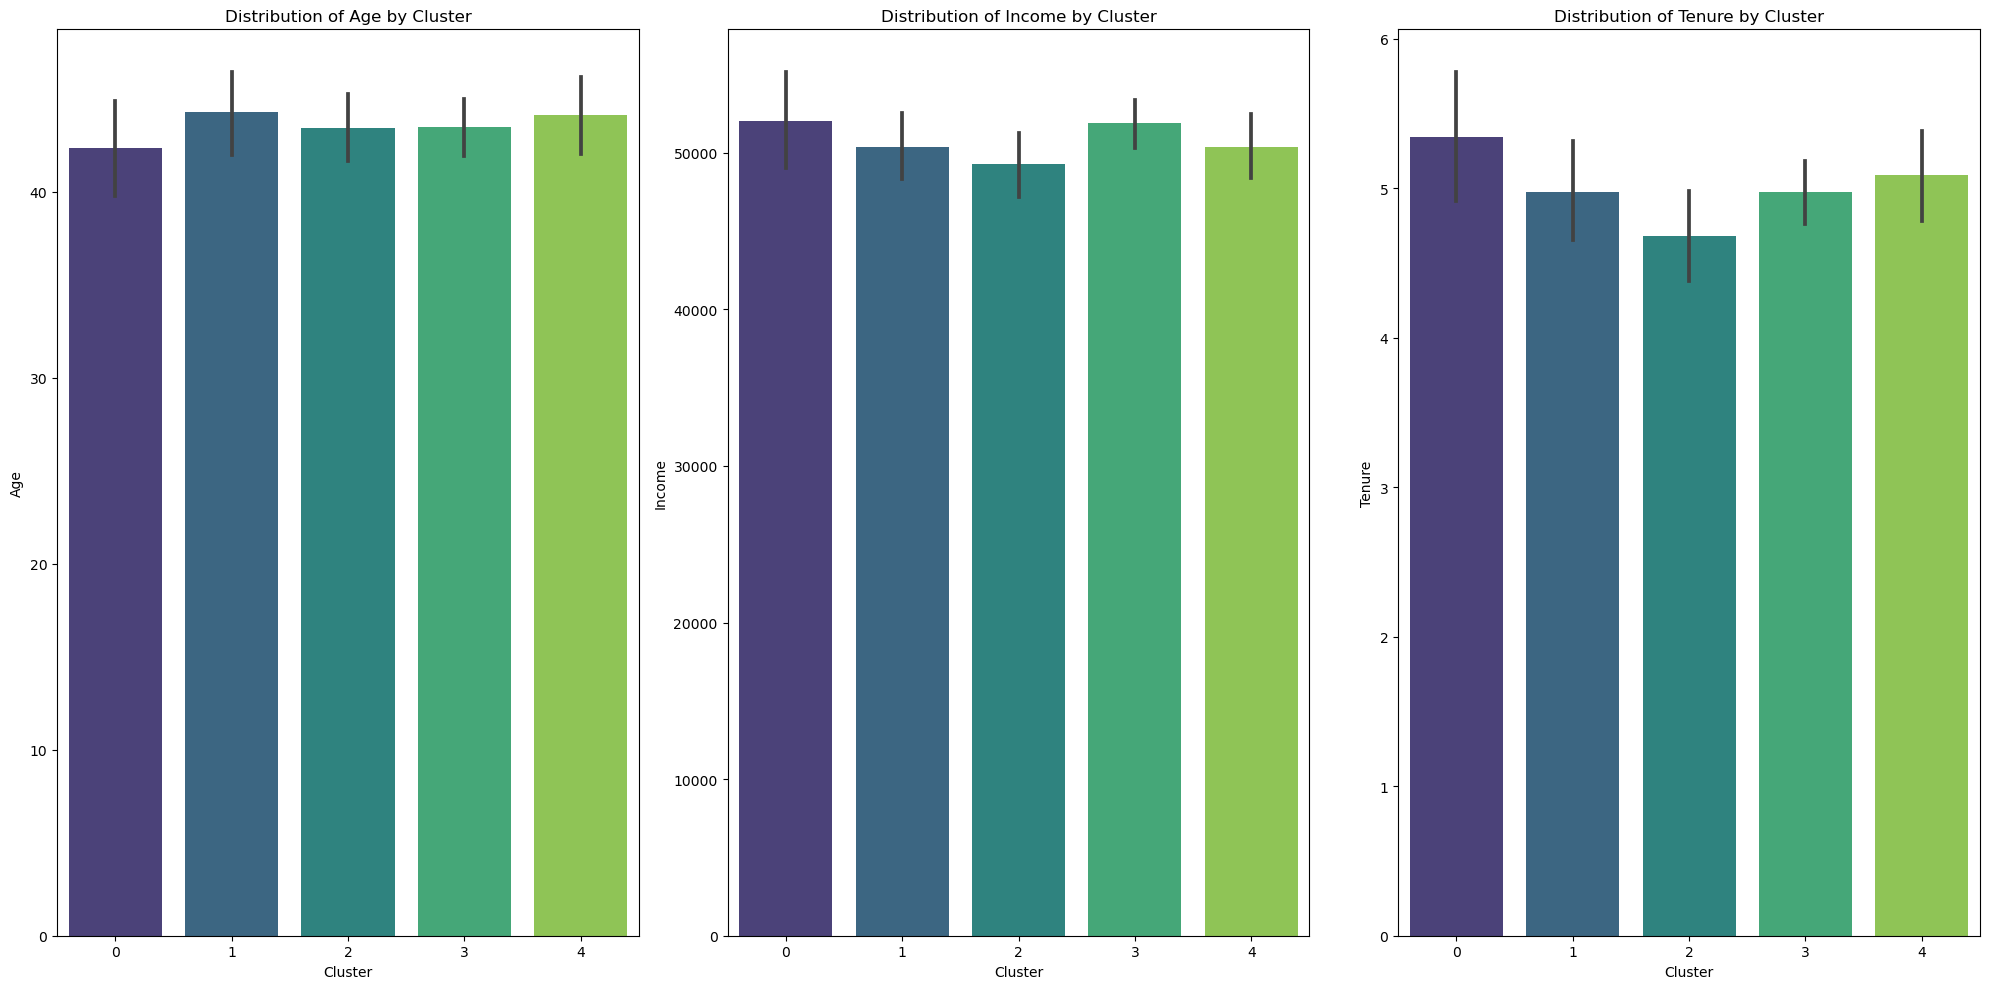

In [14]:
features_to_plot = ['Age', 'Income', 'Tenure']

plt.figure(figsize=(20, 10))

for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(1, 3, i)
    sns.barplot(x='Cluster', y=feature, data=data_encoded, palette='viridis')
    plt.title(f'Distribution of {feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

C:\Users\chris\AppData\Local\Temp\ipykernel_15588\2259257734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster'] = labels


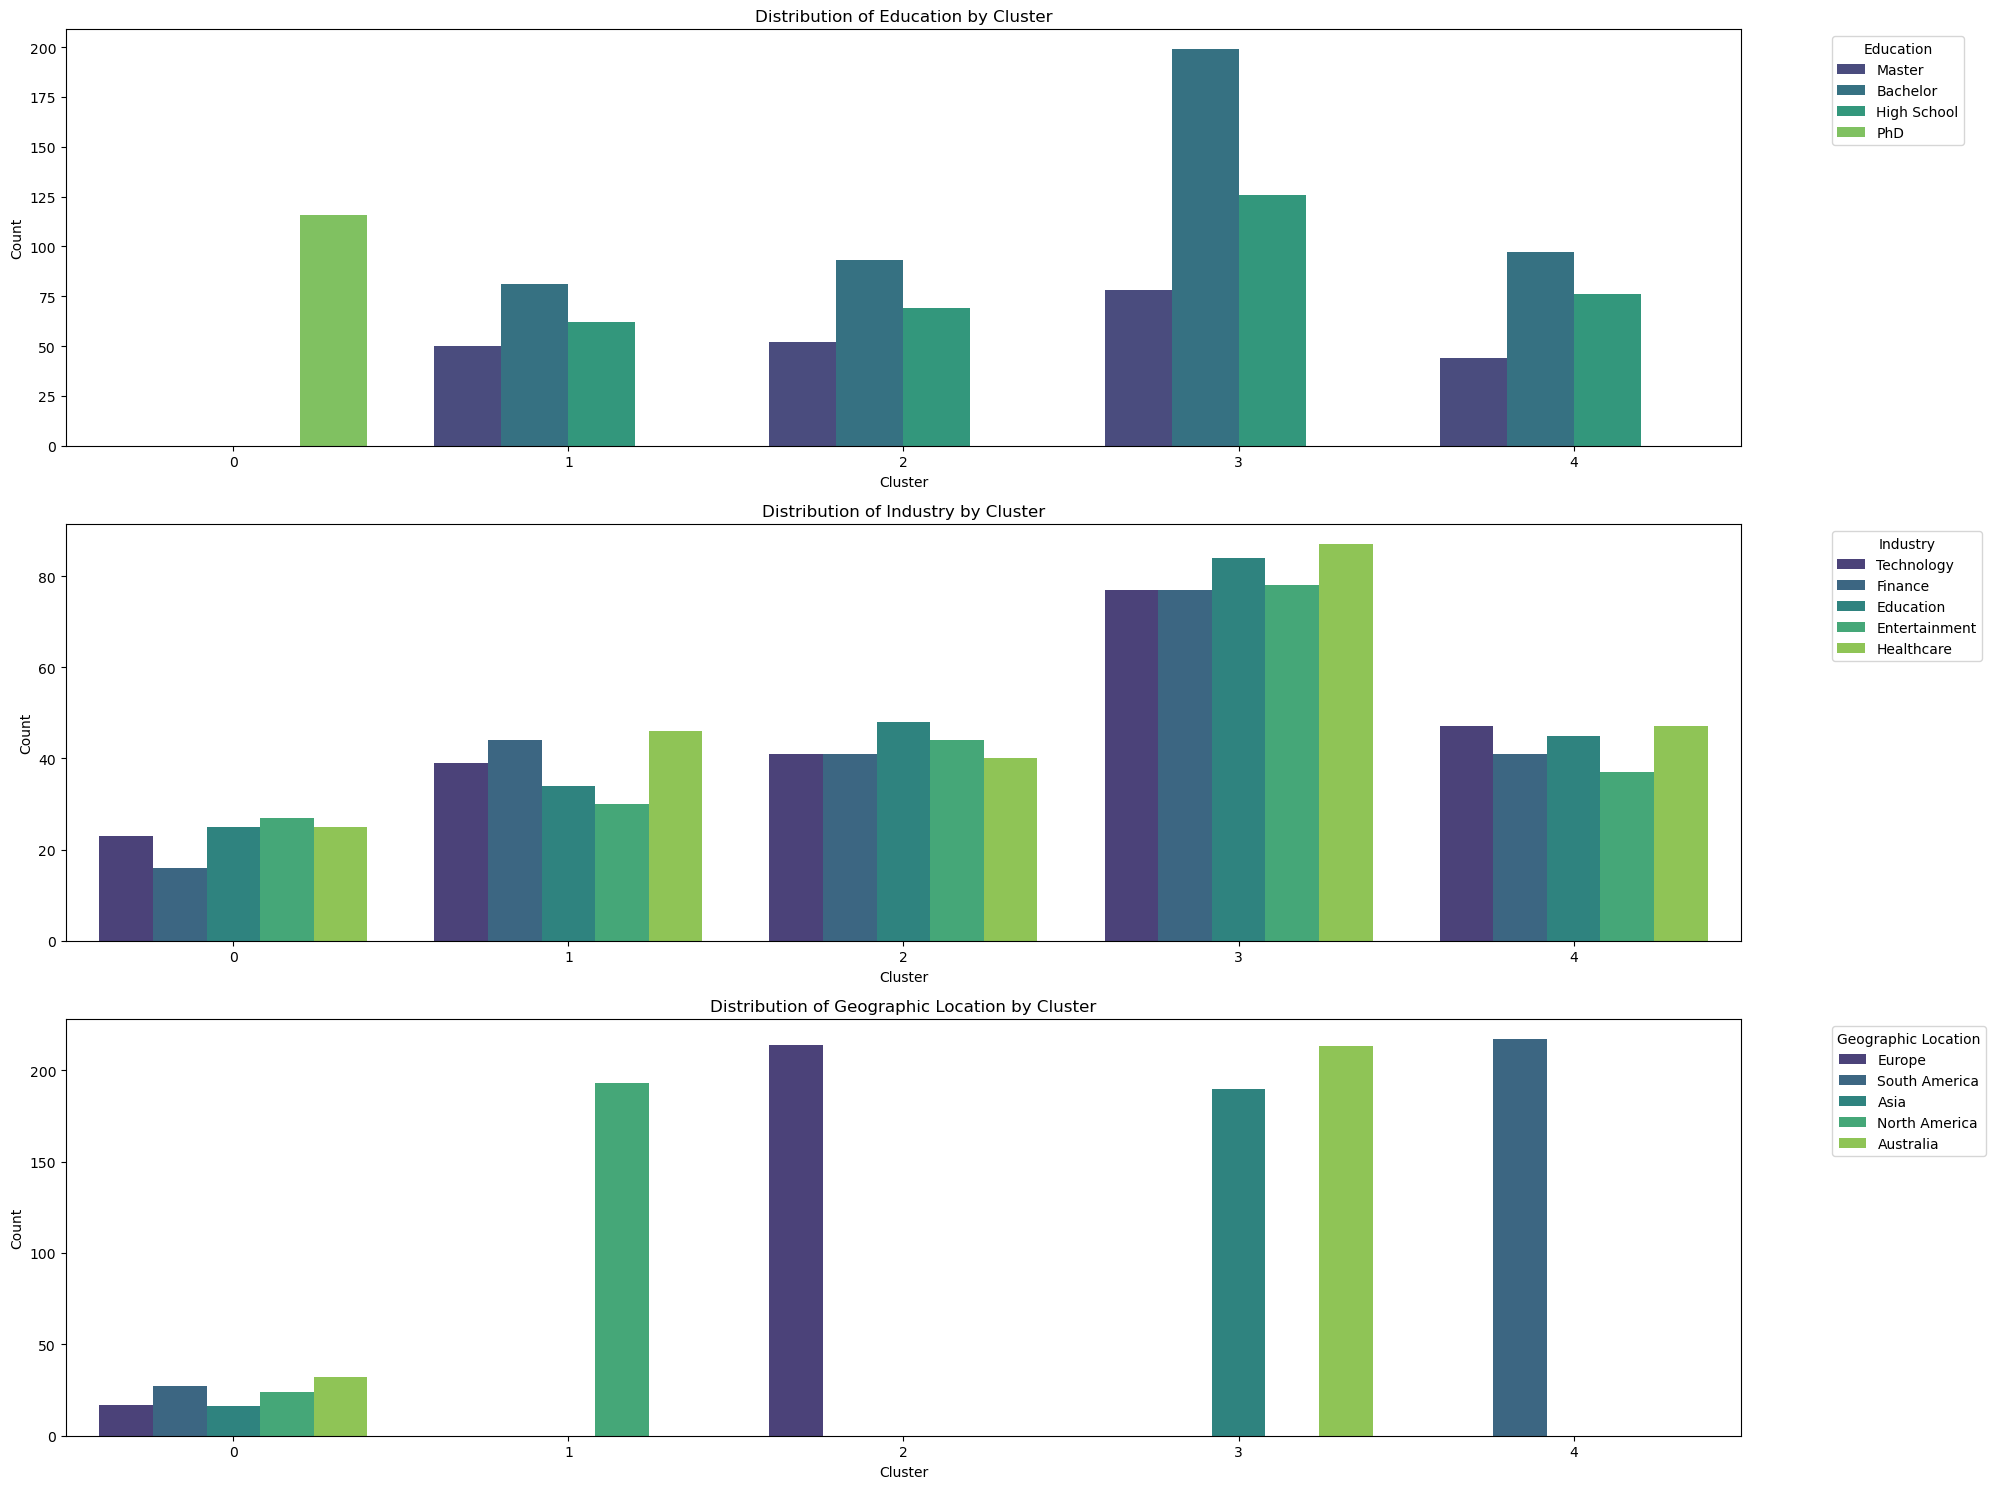

In [26]:
data['Cluster'] = labels

# Visualizar las características categóricas por cluster
plt.figure(figsize=(20, 15))

# Crear gráficos de barras apiladas para cada variable categórica
categorical_features = ['Education', 'Industry', 'Geographic Location']
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 1, i)
    sns.countplot(x='Cluster', hue=feature, data=data, palette='viridis')
    plt.title(f'Distribution of {feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Count')
    plt.legend(title=feature, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


### Act 2 

In [31]:
df_transactions.head(3)

,CustomerID,TransactionDate,TransactionAmount
0,1,2023-10-31,518.444092
1,1,2024-07-31,353.796197
2,1,2024-01-31,38.206591


In [34]:
data.loc[:, "CustomerID"] = df_cx["CustomerID"]
data.head(3)

,Age,Income,Tenure,Education,Industry,Geographic Location,Cluster,CustomerID
0,56,52752.677346,3,Master,Technology,Europe,2,1
1,69,55297.364348,6,Bachelor,Technology,South America,4,2
2,46,57978.753383,3,Bachelor,Finance,Europe,2,3


In [58]:
df_master = df_transactions.merge(data, on=["CustomerID"])

In [59]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4346 entries, 0 to 4345
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           4346 non-null   int64  
 1   TransactionDate      4346 non-null   object 
 2   TransactionAmount    4346 non-null   float64
 3   Age                  4346 non-null   int64  
 4   Income               4346 non-null   float64
 5   Tenure               4346 non-null   int64  
 6   Education            4346 non-null   object 
 7   Industry             4346 non-null   object 
 8   Geographic Location  4346 non-null   object 
 9   Cluster              4346 non-null   int32  
dtypes: float64(2), int32(1), int64(3), object(4)
memory usage: 322.7+ KB


In [60]:
df=df_master[['Cluster','TransactionDate','CustomerID']]

In [62]:
import pandas as pd

# Convertir 'TransactionDate' a datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

# Calcular la diferencia en días entre compras por 'CustomerID'
df.loc[:, 'DaysSincePurchase'] = df.groupby('CustomerID')['TransactionDate'].diff().dt.days


C:\Users\chris\AppData\Local\Temp\ipykernel_15588\2674116158.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
C:\Users\chris\AppData\Local\Temp\ipykernel_15588\2674116158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'DaysSincePurchase'] = df.groupby('CustomerID')['TransactionDate'].diff().dt.days


In [63]:
df=df.dropna()
df

,Cluster,TransactionDate,CustomerID,DaysSincePurchase
1,2,2024-07-31,1,274.0
2,2,2024-01-31,1,-182.0
3,2,2024-06-30,1,151.0
6,2,2022-10-31,3,853.0
8,4,2021-11-28,4,123.0
...,...,...,...,...
4341,2,2023-10-31,1143,184.0
4342,2,2023-05-31,1143,-153.0
4343,2,2023-10-31,1143,153.0
4344,2,2024-01-31,1143,92.0


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3235 entries, 1 to 4345
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Cluster            3235 non-null   int32         
 1   TransactionDate    3235 non-null   datetime64[ns]
 2   CustomerID         3235 non-null   int64         
 3   DaysSincePurchase  3235 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1)
memory usage: 113.7 KB


In [66]:
df['DaysSincePurchase'].quantile([0.8, 0.9, 0.95])

0.80    274.0
0.90    474.2
0.95    670.0
Name: DaysSincePurchase, dtype: float64

In [67]:
general_threshold = df['DaysSincePurchase'].quantile(0.9)
general_threshold

474.19999999999754

In [74]:
threshold = df.groupby('Cluster')['DaysSincePurchase'].agg(
    percentile_90=lambda x: x.quantile(0.90),
    transaction_count='count'
).reset_index()

threshold.head()

,Cluster,percentile_90,transaction_count
0,0,515.0,331
1,1,457.0,601
2,2,488.0,616
3,3,485.3,1128
4,4,456.0,559


In [75]:
threshold["transaction_count"].min()

331

In [76]:
threshold['threshold'] = threshold.apply(
    lambda row: general_threshold if row['transaction_count'] < 331 else row['percentile_90'],
    axis=1
)

threshold.head()

,Cluster,percentile_90,transaction_count,threshold
0,0,515.0,331,515.0
1,1,457.0,601,457.0
2,2,488.0,616,488.0
3,3,485.3,1128,485.3
4,4,456.0,559,456.0


In [79]:
last_transaction_date_per_customer = df.groupby(['Cluster','CustomerID'])['TransactionDate'].max().reset_index().rename(columns={'TransactionDate': 'LastInvoiceDate'})

last_transaction_date_per_customer.head()

,Cluster,CustomerID,LastInvoiceDate
0,0,35,2023-03-31
1,0,39,2022-11-30
2,0,42,2024-06-30
3,0,46,2020-08-28
4,0,53,2024-04-30


In [80]:
customers = last_transaction_date_per_customer.merge(threshold, on='Cluster')
customers.head()

,Cluster,CustomerID,LastInvoiceDate,percentile_90,transaction_count,threshold
0,0,35,2023-03-31,515.0,331,515.0
1,0,39,2022-11-30,515.0,331,515.0
2,0,42,2024-06-30,515.0,331,515.0
3,0,46,2020-08-28,515.0,331,515.0
4,0,53,2024-04-30,515.0,331,515.0


In [82]:
snapshot_date = df['TransactionDate'].max() 

customers['inactivity_days'] = (snapshot_date - customers['LastInvoiceDate']).dt.days
customers['churned'] = (customers['inactivity_days'] > customers['threshold']).astype('int')

customers.head()

,Cluster,CustomerID,LastInvoiceDate,percentile_90,transaction_count,threshold,inactivity_days,churned
0,0,35,2023-03-31,515.0,331,515.0,519,1
1,0,39,2022-11-30,515.0,331,515.0,640,1
2,0,42,2024-06-30,515.0,331,515.0,62,0
3,0,46,2020-08-28,515.0,331,515.0,1464,1
4,0,53,2024-04-30,515.0,331,515.0,123,0


<Axes: xlabel='Cluster'>

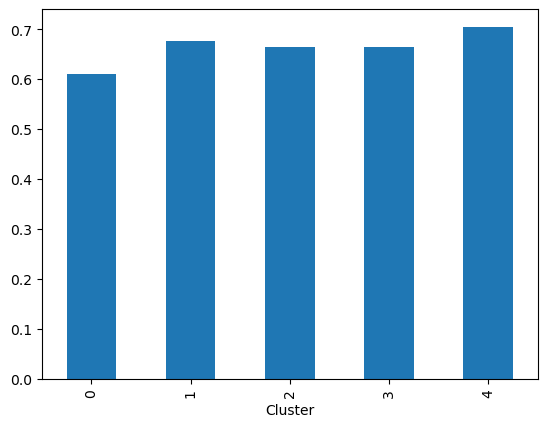

In [83]:
customers.groupby('Cluster')['churned'].mean().plot(kind='bar')